# Question 1

Decision trees are most useful for classifaction problems. In other words, when the goal is to predict which category a data point should fall into after looking at the information. Some examples of this are medical diagnoses, loan approvals, and customer segmentation. A decision tree is made up a structure of decision nodes each with a condition. For each data point, it checks a condition then follows down the respective branch until it gets to a leaf node, where it makes a final prediction of the class of the data point. Linear regressions take in the characteristics of a datum then puts into the formula to output a result in some continuous variable.
https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3

# Question 2*

Depending on the situation, we look at different metrics to evaluate the quality of our tree.

Sometimes we look at accuracy, the proportion correctly identified. This is a very balanced metric as it takes both true positives and true negatives as similar. In this way, this metric is well suited for situation where the cost of false positives and false negative are similar. For example, according to the chatbot, testing devices for failures has this quality, as a unnecessary repairs (false positives) and unexpected breaks (false negatives) cost the company a similar amount.

Sometimes we focus on sensitivity, the proportion of actual positives correctly identified. This is a metric that focuses on positives, suggesting it should be used in situations where the positives cases are more serious than negatives (and we want to maximize detection). This also explains why neither true negatives and false positives are not taken into account. One situation where this metric will likely be used is in medical diagnoses, where failure of treatment when its needed could be very dangerous. In these situations, it is less costly to treat when not necessary than failure to treat when it is.

Other times we zoom in on specificity, the proportion of actual negatives correctly identified. This is a metric that focuses on negatives, suggesting it should be used in situations where the negative cases are more serious than positives. This also explains why neither true positives and false negatives are not taken into account. This being said, specificity is the best metric for spam detection, where it is better to let a few spam messages through than to wrongly classify an important email as spam. In this way, specificity is good for when we false positives are more costly than false negatives.


Precision is another metric similar to specificity. It focuses on the proportion of positives that were correctly identified. This suggests it should be used in situation where you'd like to minimize false positives. This is useful for saving resources. Like in a competitive job interview process where interviewers want to only offer interviews to the best of the best of the candiates.

https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3

# Question 3

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

del ab["Width"]
del ab["Weight_oz"]
del ab["Height"]
ab = ab.dropna()
ab["Pub year"] = ab["Pub year"].astype(int)
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")
ab


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3
# Question 4

In [2]:
train_data, test_data = train_test_split(ab, test_size=0.2, random_state=42)

# Report the number of observations
print(f"Number of observations in the training set: {len(train_data)}")
print(f"Number of observations in the test set: {len(test_data)}")

Number of observations in the training set: 255
Number of observations in the test set: 64


y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] converts Hard_or_Paper into indicators variables. 1 for hardcover, 0 otherwise.

X = ab_reduced_noNaN[['List Price']] intializes a predictor variable X to later be used in regression.


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Paperback')]

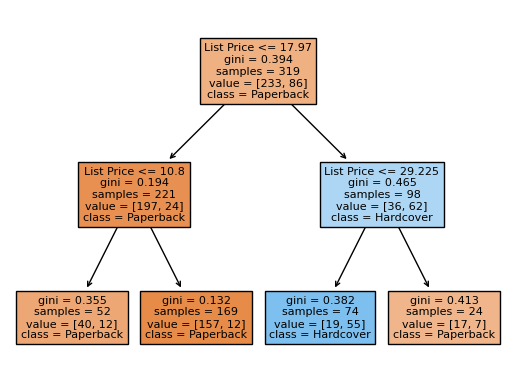

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X = ab[['List Price']]
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)

First list price is compared against 17.97. If greater, than it compares against 29.225, otherwise it compares against 10.8 then assigns paperback regardless. If still greater, paperback, otherwise hardcover. 
https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3

# Question 5

[Text(0.45652173913043476, 0.9, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.1956521739130435, 0.7, 'NumPages <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.08695652173913043, 0.5, 'Thick <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Hardcover'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Hardcover'),
 Text(0.30434782608695654, 0.5, 'Thick <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]\nclass = Paperback'),
 Text(0.21739130434782608, 0.3, 'List Price <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]\nclass = Paperback'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]\nclass = Paperback'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Paperback'),
 Text(0.3913043

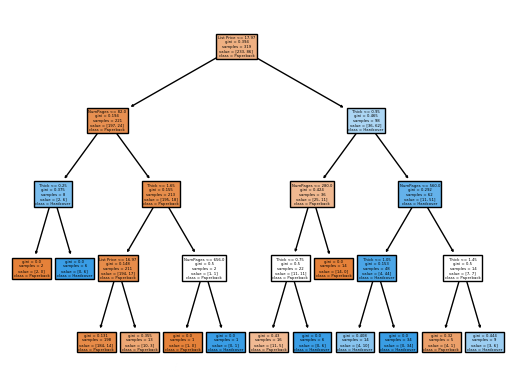

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Prepare the features (X) and target (y)
X = ab[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Train the classification tree
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the decision tree
plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)


All candidates for classifaction start at the root. Then it goes through a series of comparisons, traversing the tree accordingly. When it reaches the end, which is called a leaf node, it is given a classifaction based on its path.
https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3

# Question 6

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict on test set for clf
y_test = pd.get_dummies(test_data["Hard_or_Paper"])['H']
X_test_clf = test_data [['List Price']]
y_pred_clf = clf.predict(X_test_clf)

# Predict on test set for clf2
X_test_clf2 = test_data[['NumPages', 'Thick', 'List Price']]
y_pred_clf2 = clf2.predict(X_test_clf2)



# Confusion matrix for clf
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
print("Confusion Matrix for clf:\n", conf_matrix_clf)

# Confusion matrix for clf2
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)
print("Confusion Matrix for clf2:\n", conf_matrix_clf2)


# Define a function to compute metrics
def compute_metrics(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(conf_matrix_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(conf_matrix_clf2)

# Report results
print(f"Metrics for clf:\nSensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}, Accuracy: {accuracy_clf:.2f}")
print(f"Metrics for clf2:\nSensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}, Accuracy: {accuracy_clf2:.2f}")


Confusion Matrix for clf:
 [[40  4]
 [ 3 17]]
Confusion Matrix for clf2:
 [[42  2]
 [ 2 18]]
Metrics for clf:
Sensitivity: 0.85, Specificity: 0.91, Accuracy: 0.89
Metrics for clf2:
Sensitivity: 0.90, Specificity: 0.95, Accuracy: 0.94


https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3
# Question 7

The code itself is nonfunctional. For the second matrix, it is trying to use clf (a regression with one variable) to predict based off of the number of pages, thickness, and list price. This results in the following error.

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- NumPages
- Thick


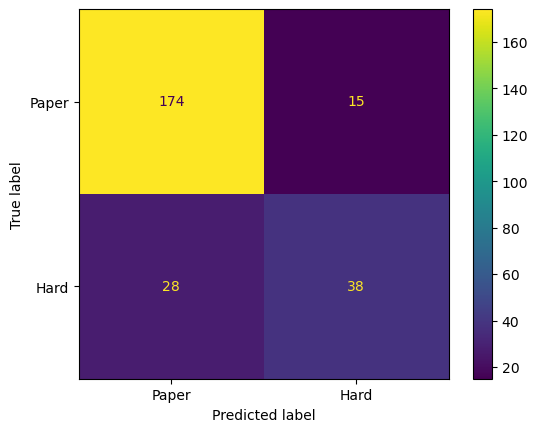

In [15]:
try:
    ConfusionMatrixDisplay(
        confusion_matrix(pd.get_dummies(train_data["Hard_or_Paper"])['H'], 
                         clf.predict(train_data[['List Price']]), 
                         labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
    ConfusionMatrixDisplay(
        confusion_matrix(pd.get_dummies(train_data["Hard_or_Paper"])['H'], 
                         clf.predict(
                             train_data[['NumPages','Thick','List Price']]), 
                         labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
except Exception as e:
    print("""ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- NumPages
- Thick""")

This can easily be fixed by changing it to clf2. This results in the following matrices.

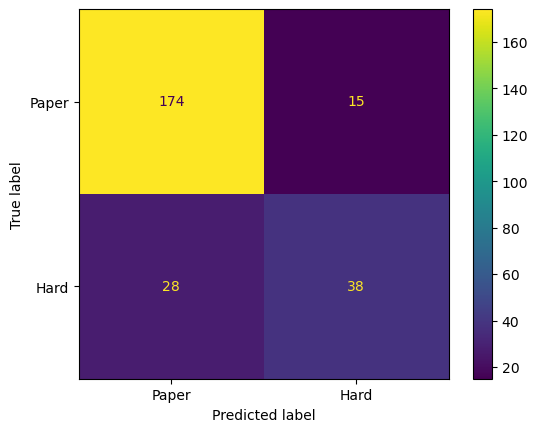

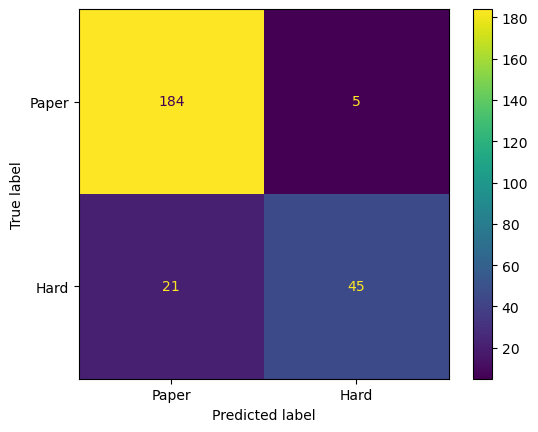

In [7]:
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(train_data["Hard_or_Paper"])['H'], 
                     clf.predict(train_data[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(train_data["Hard_or_Paper"])['H'], 
                     clf2.predict(
                         train_data[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

These are the confusion matrices for the training data. These are more or less useless because they are the results of predictions on the training set using for the training! It is not easy to tell the true efficacy of your predictors because you do not know if it is truely good or just overfitted.

https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3

# Question 8

In [ ]:
# Get feature importances and corresponding feature names
importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Combine feature names and importances into a DataFrame for easier reporting
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display the feature with the highest importance
print("Feature importances for clf2:\n", importance_df)
print("\nMost important feature:", importance_df.iloc[0]['Feature'])


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for feature importances
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue', edgecolor='black')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importances in clf2", fontsize=14)
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

https://chatgpt.com/share/6740060d-a058-8011-ae87-649aea7f85e3
# Question 9

Interpretation of linear regression variables is a measure of how (at all) each predictor affects the outcome. Interpretation of the importance of features is a how much each feature affects the classifaction of a datum.

# Question 10
Yes